# Figure 3
 - Explained variance each subject individually
 

In [21]:
%matplotlib widget
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from subjects import GroupData
from neuropy import plotting

grpdata = GroupData()
ev_df = grpdata.ev_pooled.reset_index(drop=True)
ev_df['ev_diff'] = ev_df['ev']-ev_df['rev']

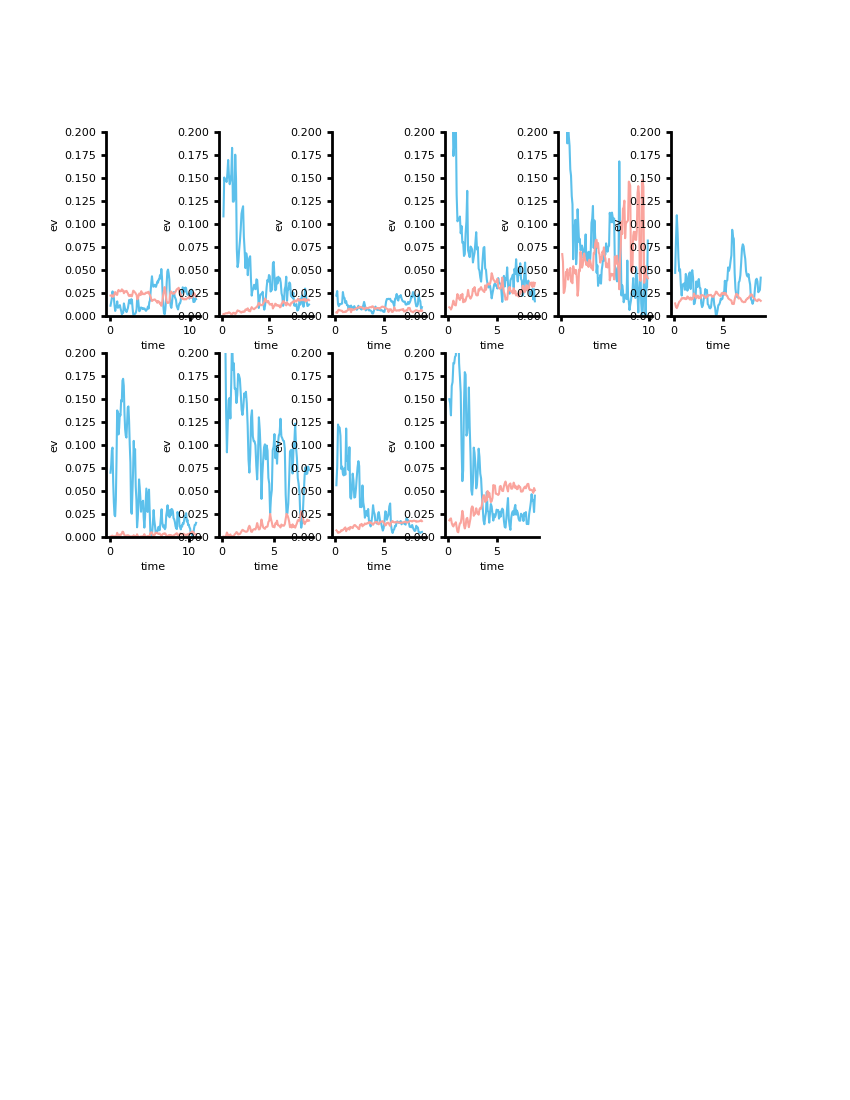

In [22]:
import numpy as np
figure = plotting.Fig()
fig,gs = figure.draw(grid=(4,6))

for sub in range(10):
    df = ev_df[ev_df['sub']==sub]
    ax = plt.subplot(gs[sub])
    sns.lineplot(data=df,x='time',y='ev',ci=None,ax=ax)
    sns.lineplot(data=df,x='time',y='rev',ci=None,ax=ax)
    ax.set_ylim([0,0.2])



# sns.lineplot(data=ev_df,x='time',y='ev_diff',hue='grp',ax=ax,ci=None,estimator=np.median)
plt.show()

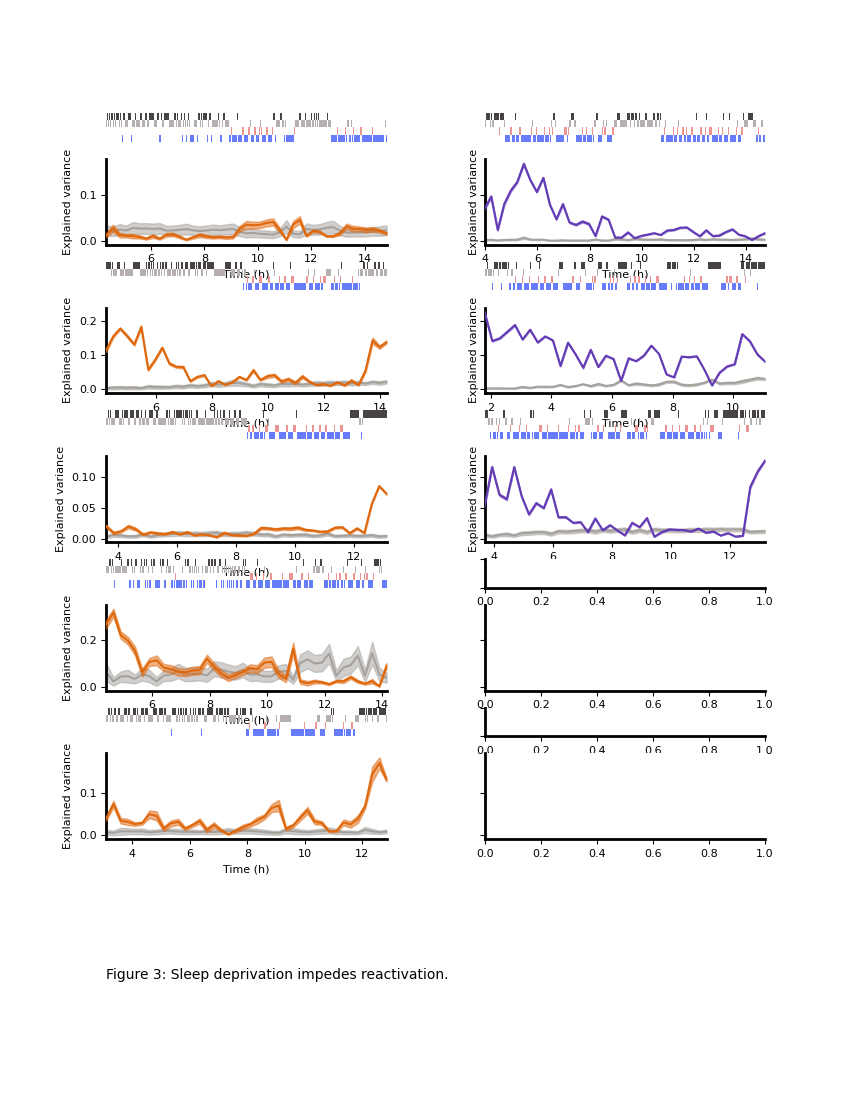

In [4]:
%matplotlib widget
import seaborn as sns
import numpy as np

figure = plotting.Fig()
fig, gs = figure.draw(num=1, grid=(7, 4), hspace=0.3, wspace=0.35)
fig.suptitle("Figure 3", x=0, ha="left", fontsize=16)

# ------- plotting individual sessions ---------
subfig = fig.add_subfigure(gs[:6, :])
axs_subfig = subfig.subplots(
    10, 2, sharex=False, sharey="row", gridspec_kw={"height_ratios": [1, 3, 1, 3, 1, 3,1,3,1,3]}
)
sessions = [sd_sessions, nsd_sessions]
for grp_i, (expvar_grp, grp) in enumerate(zip([sd_expvar, nsd_expvar], ["sd", "nsd"])):
    grp_sessions = sessions[grp_i]
    for i, expvar in enumerate(expvar_grp):
        ax = axs_subfig[2 * i + 1, grp_i]
        expvar.colors["ev"] = sd_colors[grp]
        expvar.colors["rev"] = "#a5a19c"
        expvar.plot(ax=ax, legend=None)

        post = grp_sessions[i].paradigm["post"]
        rec_stop = grp_sessions[i].eegfile.duration
        post_brainstates = grp_sessions[i].brainstates.time_slice(post[0], rec_stop)
        ax_hypno = axs_subfig[2 * i, grp_i]
        plotting.plot_hypnogram(post_brainstates, ax=ax_hypno)

df = pd.DataFrame()
for grp, expvars in enumerate([sd_expvar, nsd_expvar]):
    for i, expvar in enumerate(expvars):
        ev_diff = expvar.ev - expvar.rev
        ev_bins = np.arange(len(ev_diff))
        df = df.append(
            pd.DataFrame({"ev_diff": ev_diff, "bins": ev_bins, "grp": grp}),
            ignore_index=True,
        )

# ax = plt.subplot(gs[3:5, 1:3])
# sns.lineplot(
#     data=df,
#     x="bins",
#     y="ev_diff",
#     hue="grp",
#     ci=None,
#     ax=ax,
#     linewidth=3,
#     palette=sd_colors.values(),
# )
# ax.set_ylabel("Explained variance")
# ax.set_xlabel("ZT bins")

# ----- caption --------
ax_caption = figure.add_subplot(gs[6:, :])
ax_caption.text(
    0,
    0,
    "Figure 3: Sleep deprivation impedes reactivation.",
    wrap=True,
)
ax_caption.axis("off")
figure.savefig(figpath_sd / "figure3")
